<a href="https://colab.research.google.com/github/geovalexis/ml-in-args/blob/master/ml/ML_for_AMR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [3]:
args_df = pd.read_csv("/content/drive/MyDrive/TFM/data/args_data_cleaned.tsv", sep="\t", header=0)
args_df

,sample_name,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,...,blaTEM-1D,bleO,cmlA1,dfrA14,dfrA15,dfrA17,qnrB19,qnrS1,sul3,tet(G)
0,GCA_012637185.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_012637285.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_012637315.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_012637385.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_012637425.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,GCA_005294025.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
935,GCA_005294085.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936,GCA_005294105.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,GCA_005294125.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
snps_df = pd.read_csv("/content/drive/MyDrive/TFM/data/snps_data_cleaned.tsv", sep="\t", header=0)
snps_df

,sample_name,ECs_1169/123,ECs_1169/456,ECs_1169/462,ECs_1169/511,ECs_1169/66,ECs_1169/381,ECs_1169/312,ECs_1169/321,ECs_1169/324,...,FOC43_RS06865/532,FOC43_RS06865/1220,FOC43_RS06865/1253,FOC43_RS06865/1346,FOC43_RS06865/663,FOC43_RS06865/142,FOC43_RS06865/146,FOC43_RS06865/150,FOC43_RS06865/163,FOC43_RS06865/177
0,GCA_012688215.1,3,1,1,2,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,GCA_012677385.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,GCA_005287105.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,GCA_005284005.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,GCA_012708885.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,GCA_005292985.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
59,GCA_005292485.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,4,2,4,2,1
60,GCA_005287845.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
61,GCA_005293225.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
amr_labels_df = pd.read_csv("/content/drive/MyDrive/TFM/data/amr_labels_cleaned.tsv", sep="\t", header=0)
amr_labels_df

,SampleID,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,GCA_007192475.1,1.0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_007191145.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_007188155.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_007190575.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0
4,GCA_007194615.1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GCA_006500015.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6203,GCA_006497875.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,1.0
6204,GCA_006497955.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
6205,GCA_006815005.1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,1.0,1.0,0.0


# Apply ML methods

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The following sections are meant to be run separately

## Approach 1: both ARGs and SNPs

In [7]:
X = pd.merge(args_df, snps_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name") #TODO: instead of setting -1, set only -1 if gene does not belong to the sample/specie, otherwise 0.
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,FOC43_RS06865/532,FOC43_RS06865/1220,FOC43_RS06865/1253,FOC43_RS06865/1346,FOC43_RS06865/663,FOC43_RS06865/142,FOC43_RS06865/146,FOC43_RS06865/150,FOC43_RS06865/163,FOC43_RS06865/177
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_012637185.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_012637285.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_012637315.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_012637385.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_012637425.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_005294025.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_005294085.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
GCA_005294105.1,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).dropna(axis=1).set_index("sample_name")
y

,ciprofloxacin,gentamicin,nalidixic acid,tetracycline
sample_name,,,,
GCA_012637185.1,0,0.0,0.0,0.0
GCA_012637285.1,0,0.0,0.0,0.0
GCA_012637315.1,0,0.0,0.0,0.0
GCA_012637385.1,0,0.0,0.0,0.0
GCA_012637425.1,0,0.0,0.0,0.0
...,...,...,...,...
GCA_005294025.1,0,0.0,0.0,1.0
GCA_005294085.1,1,0.0,1.0,1.0
GCA_005294105.1,1,0.0,1.0,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7712765957446809


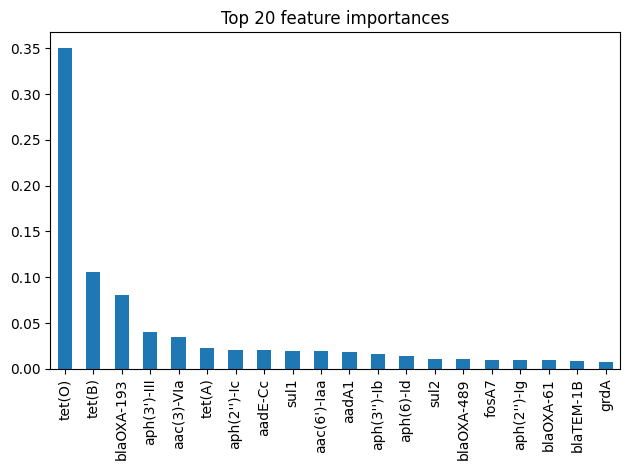

In [18]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

## Approach 2: only ARGs data

In [25]:
X = args_df.copy().set_index("sample_name")
X

,NarA,NarB,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aac(6')-aph(2''),aadA1,aadA2,aadE-Cc,ant(2'')-Ia,...,blaTEM-1D,bleO,cmlA1,dfrA14,dfrA15,dfrA17,qnrB19,qnrS1,sul3,tet(G)
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_012637185.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637285.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637315.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637385.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637425.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_005294025.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_005294085.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_005294105.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).dropna(axis=1).set_index("sample_name")
y

,ciprofloxacin,gentamicin,nalidixic acid,tetracycline
sample_name,,,,
GCA_012637185.1,0,0.0,0.0,0.0
GCA_012637285.1,0,0.0,0.0,0.0
GCA_012637315.1,0,0.0,0.0,0.0
GCA_012637385.1,0,0.0,0.0,0.0
GCA_012637425.1,0,0.0,0.0,0.0
...,...,...,...,...
GCA_005294025.1,0,0.0,0.0,1.0
GCA_005294085.1,1,0.0,1.0,1.0
GCA_005294105.1,1,0.0,1.0,1.0


In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).dropna(axis=1).set_index("sample_name")
y

,ciprofloxacin,gentamicin,nalidixic acid,tetracycline
sample_name,,,,
GCA_012637185.1,0,0.0,0.0,0.0
GCA_012637285.1,0,0.0,0.0,0.0
GCA_012637315.1,0,0.0,0.0,0.0
GCA_012637385.1,0,0.0,0.0,0.0
GCA_012637425.1,0,0.0,0.0,0.0
...,...,...,...,...
GCA_005294025.1,0,0.0,0.0,1.0
GCA_005294085.1,1,0.0,1.0,1.0
GCA_005294105.1,1,0.0,1.0,1.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7978723404255319


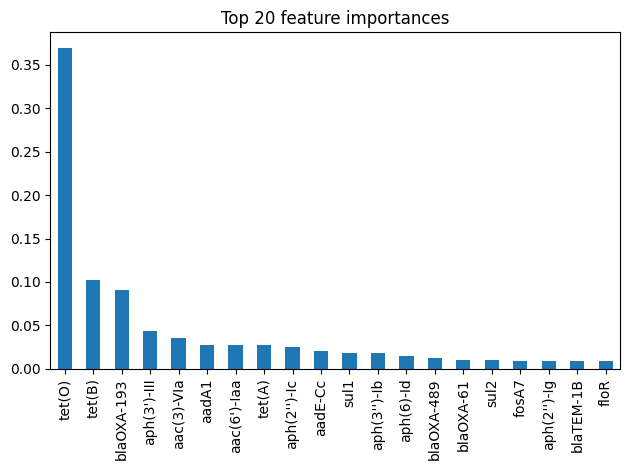

In [30]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

## Approach 3: only ARGs data

In [31]:
X = snps_df.copy().set_index("sample_name")
X

,ECs_1169/123,ECs_1169/456,ECs_1169/462,ECs_1169/511,ECs_1169/66,ECs_1169/381,ECs_1169/312,ECs_1169/321,ECs_1169/324,ECs_1169/411,...,FOC43_RS06865/532,FOC43_RS06865/1220,FOC43_RS06865/1253,FOC43_RS06865/1346,FOC43_RS06865/663,FOC43_RS06865/142,FOC43_RS06865/146,FOC43_RS06865/150,FOC43_RS06865/163,FOC43_RS06865/177
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_012688215.1,3,1,1,2,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_012677385.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_005287105.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_005284005.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_012708885.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_005292985.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
GCA_005292485.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,4,2,4,2,1
GCA_005287845.1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [35]:
y = pd.merge(snps_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).dropna(axis=1).set_index("sample_name")
y

,ciprofloxacin,gentamicin,nalidixic acid,tetracycline
sample_name,,,,
GCA_012688215.1,0,0.0,0.0,0.0
GCA_012677385.1,0,0.0,0.0,0.0
GCA_005287105.1,0,0.0,0.0,1.0
GCA_005284005.1,0,0.0,0.0,1.0
GCA_012708885.1,0,0.0,0.0,0.0
...,...,...,...,...
GCA_005292985.1,0,0.0,0.0,1.0
GCA_005292485.1,0,0.0,0.0,1.0
GCA_005287845.1,0,0.0,0.0,1.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231


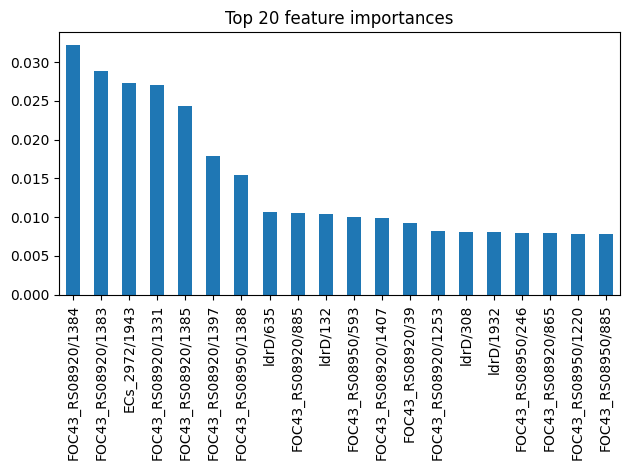

In [38]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()